# Visualize Weights


https://github.com/fchollet/keras/issues/1922



# Load modules

In [1]:
import time
import glob, os, os.path
import h5py
import numpy as np

import matplotlib.pylab as plt

import os
os.environ['KERAS_BACKEND'] = 'theano'

%matplotlib inline
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.callbacks import ModelCheckpoint
from keras.optimizers import adam
from keras.models import Model


pathFiles = "/home/atilla/Documents/DeepLearning/Model/"
os.chdir(pathFiles)

Using Theano backend.


In [2]:
import cv2
from keras.preprocessing.image import img_to_array
from vis.utils import utils
from keras import backend as K

from vis.visualization import visualize_cam
from vis.visualization import visualize_activation, get_num_filters

# Load Model


In [3]:
from keras.models import load_model
model = load_model('/home/atilla/Documents/DeepLearning/Model/Compare/Simple/2017-05-16-10:53:41/V4_modelA2.hdf5')
#model.load_weights('/home/atilla/Documents/DeepLearning/Model/weightsRGB.hdf5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 30, 360, 2)        0         
_________________________________________________________________
zero_1 (ZeroPadding2D)       (None, 32, 362, 2)        0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 30, 360, 8)        152       
_________________________________________________________________
max_1 (MaxPooling2D)         (None, 15, 180, 8)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 21600)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               2764928   
_________________________________________________________________
drop_1 (Dropout)             (None, 128)               0         
__________

# Load Weights

In [70]:
model.load_weights('/home/atilla/Documents/DeepLearning/Model/Compare/Simple/2017-05-16-10:53:41//weights.hdf5')


In [71]:
# which layer to load
layer_name = 'conv_1'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name]
W = model.layers[layer_idx[0]].get_weights()

#Reformat
W = np.squeeze(W)
print(W[0].shape)
W1 =np.transpose(W[0], (2,3,0,1))
print(W1.shape)

(3, 3, 2, 8)
(2, 8, 3, 3)


In [73]:
W1.shape[2]

3

# Visualize weights as optic flow arrows

In [ ]:
# Separate weights, first channel ofx, second channel ofy
W_ofx = W1[0,:,:,:]
W_ofy = W1[1,:,:,:]
print(W_ofx.shape, W_ofy.shape)

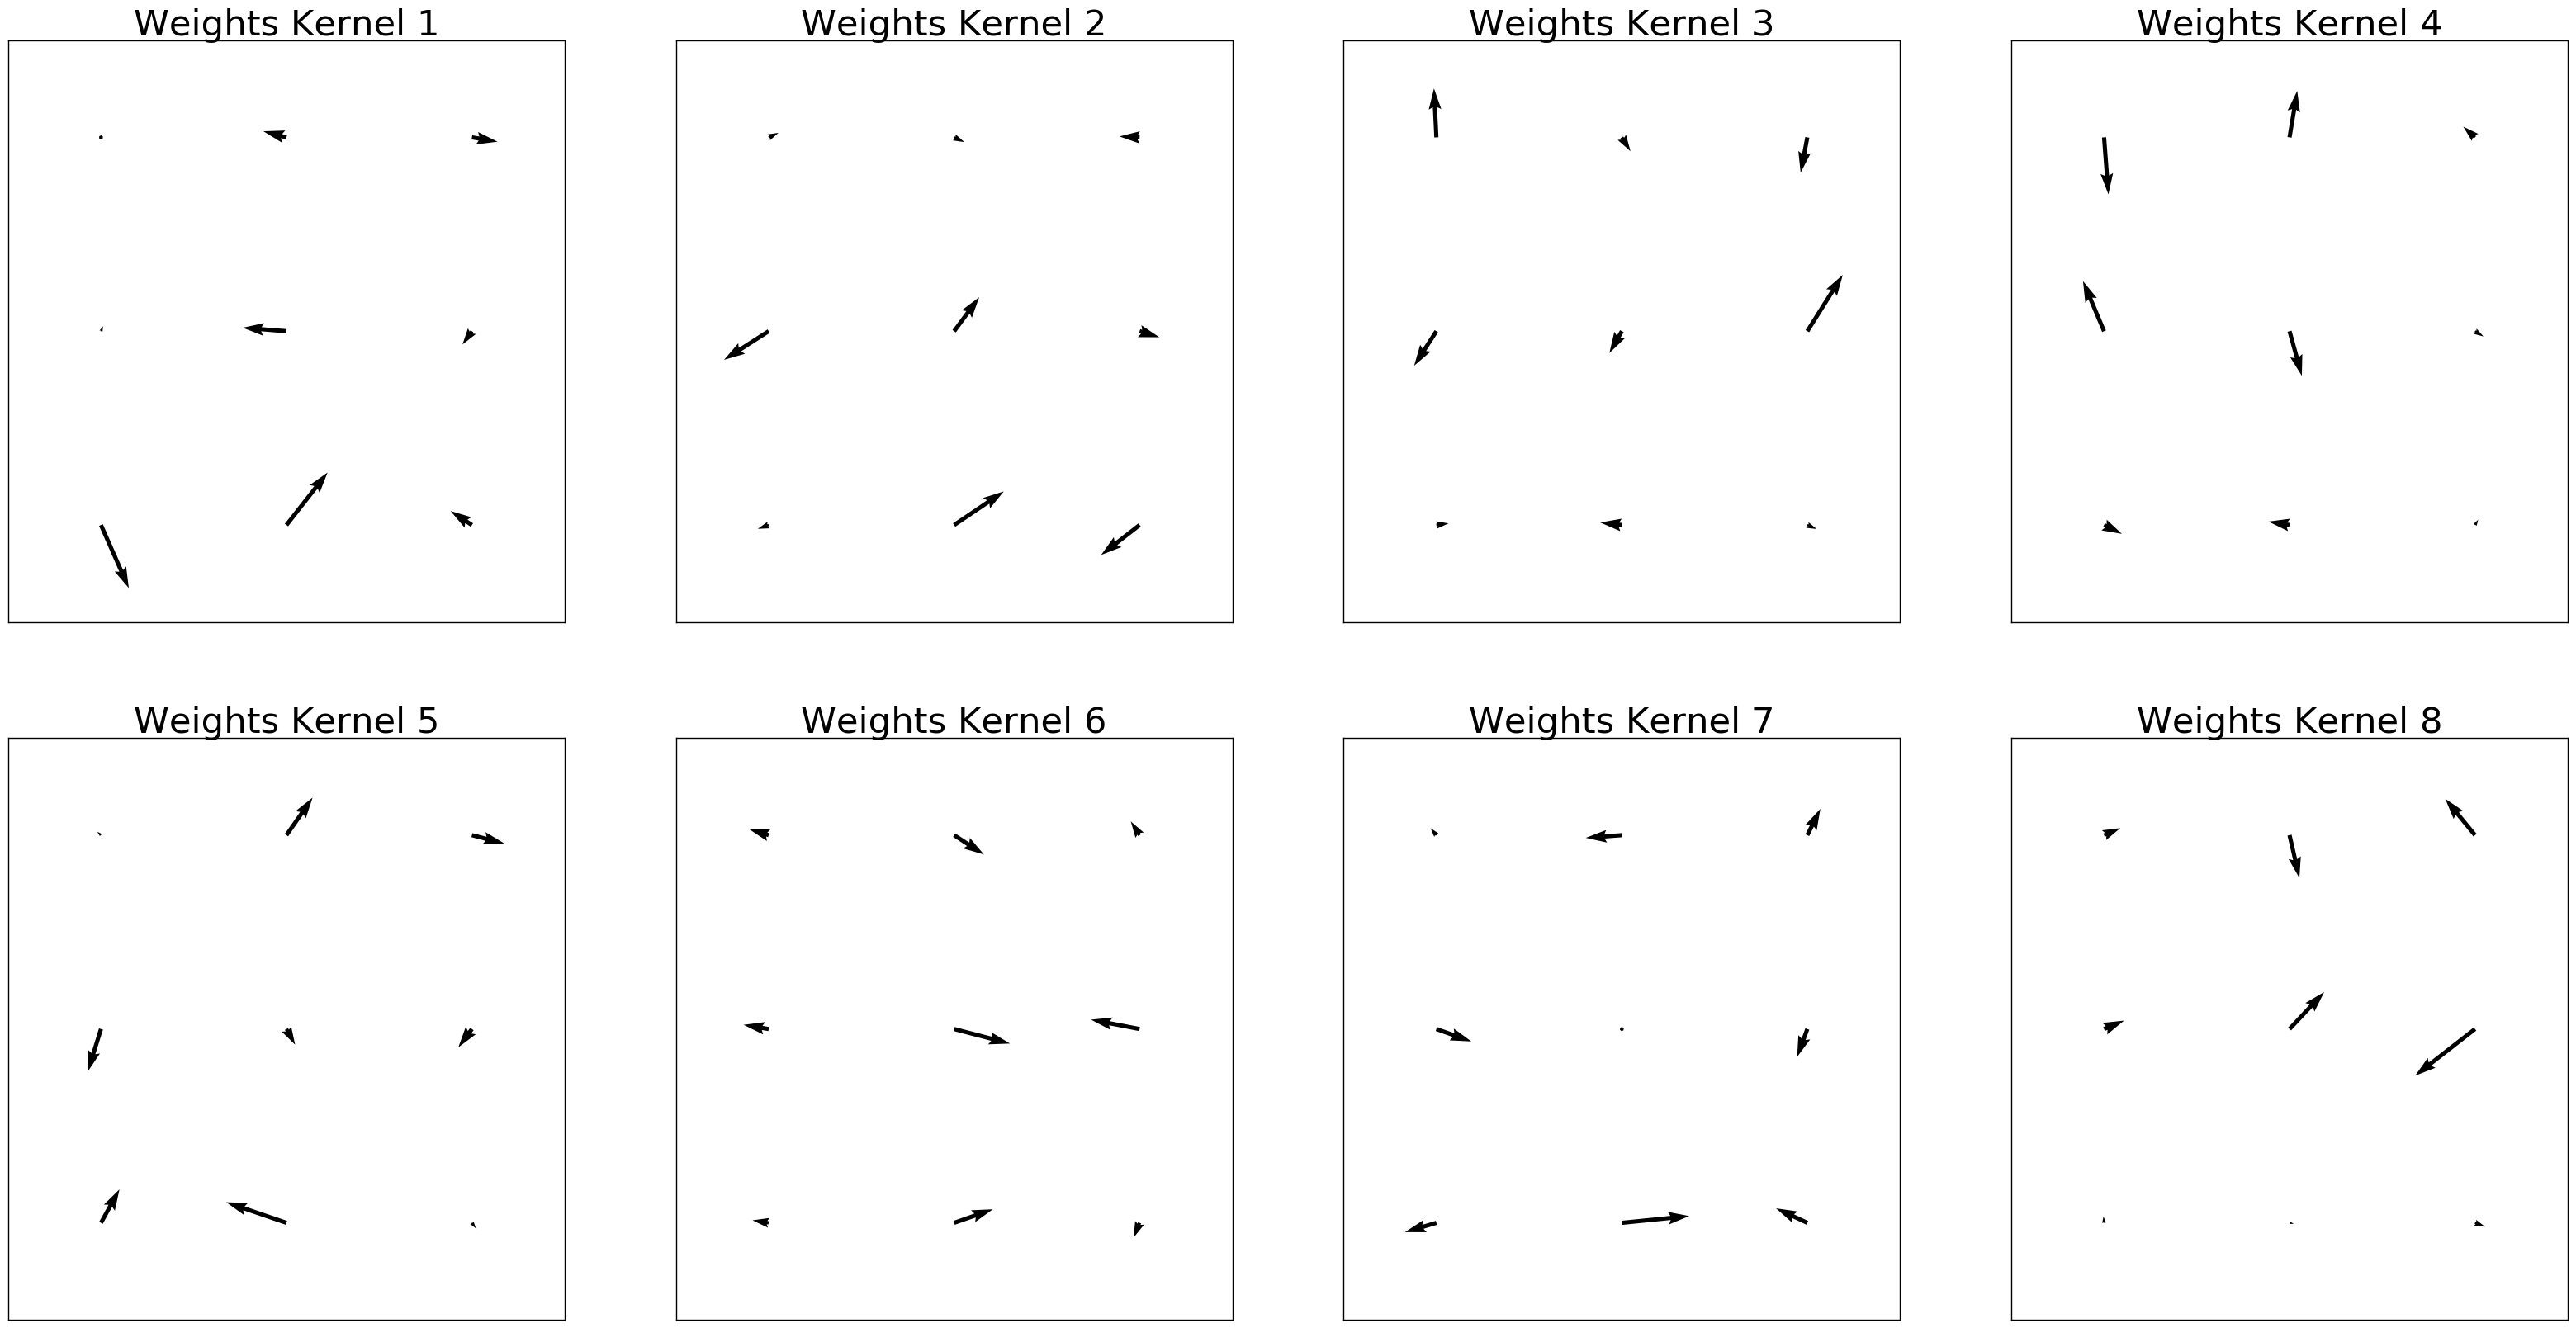

In [98]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from numpy import ma
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}

matplotlib.rc('font', **font)

fig, axarr = plt.subplots(figsize=[40, 20],
                          nrows=int(np.ceil(W1.shape[1]/4)), ncols=4)

for output_index  in range(W1.shape[1]):
    
    X, Y = np.meshgrid(np.linspace(-2,2,W1.shape[2]), np.linspace(-2,2,W1.shape[3]))
    #print(X,Y)

    U = W_ofx[output_index]
    #print(U)
    V = W_ofy[output_index]
    #print(V)
    #print(output_index%4)
    ax = axarr[output_index//4, output_index%4]

    Q = ax.quiver(X,Y,U, V, units='width')
    ax.set_ylim(-3,3)
    ax.set_xlim(-3,3)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_title('Weights Kernel '+str(output_index+1))
 
    


# Visualize Weights CNN

In [9]:
# utility functions, from paper
from mpl_toolkits.axes_grid1 import make_axes_locatable

def nice_imshow(ax, data, vmin=None, vmax=None, cmap=None):
    """Wrapper around pl.imshow"""
    if cmap is None:
        cmap = cm.jet
    if vmin is None:
        vmin = data.min()
    if vmax is None:
        vmax = data.max()
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    im = ax.imshow(data, vmin=vmin, vmax=vmax, interpolation='nearest', cmap=cmap)
    pl.colorbar(im, cax=cax)



In [10]:
# From paper
import matplotlib.cm as cm
import numpy.ma as ma
def make_mosaic(imgs, nrows, ncols, border=1):
    """
    Given a set of images with all the same shape, makes a
    mosaic with nrows and ncols
    """
    nimgs = imgs.shape[0]
    print(nimgs)
    imshape = imgs.shape[1:]
    print(imshape, 'imshape')
    
    mosaic = ma.masked_all((nrows * imshape[0] + (nrows - 1) * border,
                            ncols * imshape[1] + (ncols - 1) * border),
                            dtype=np.float32)
    print(mosaic.shape)
    
    paddedh = imshape[0] + border
    paddedw = imshape[1] + border
    for i in range(nimgs):
        row = int(np.floor(i / ncols))
        col = i % ncols
        
        mosaic[row * paddedh:row * paddedh + imshape[0],
               col * paddedw:col * paddedw + imshape[1]] = imgs[i]
    print(mosaic.shape)
    return mosaic

8
(3, 3) imshape
(7, 15)
(7, 15)
8
(3, 3) imshape
(7, 15)
(7, 15)


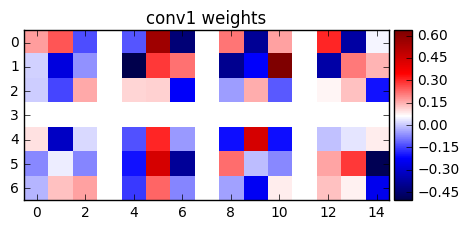

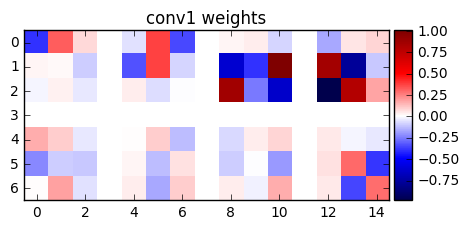

In [13]:
import pylab as pl
pl.figure(figsize=(5, 10))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W1[0], 2, 4), cmap=cm.seismic)
pl.figure(figsize=(5, 10))
pl.title('conv1 weights')
nice_imshow(pl.gca(), make_mosaic(W1[1], 2, 4), cmap=cm.seismic)
#nice_imshow(pl.gca(), make_mosaic(W1[0], 4, 4), cmap=cm.seismic)
#nice_imshow(pl.gca(), make_mosaic(W[0][2,:,:,:], 6, 6), cmap=cm.binary)

# Histogram of weights

(144,)
0.000594541 0.0802248


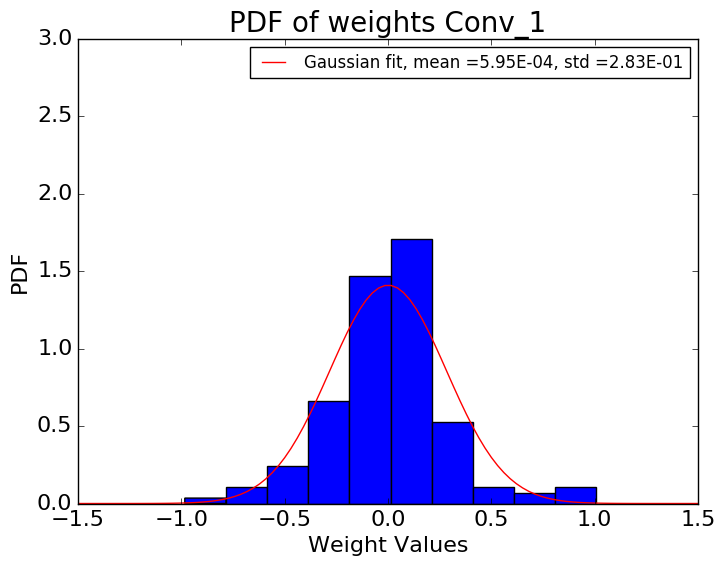

In [64]:
from decimal import Decimal




# Histogram of weights
import matplotlib.pyplot as plt

W_flat = W[0].flatten() # weights 
print(W_flat.shape)
plt.figure(figsize =(8,6) )
plt.hist(W_flat, normed = True)
# If True, the result is the value of the probability density function at the bin,
#normalized such that the integral over the range is 1.
#Note that this latter behavior is known to be buggy with unequal bin widths; use density instead.

plt.xlim((min(W_flat), max(W_flat)))

import matplotlib.mlab as mlab

mean = np.mean(W_flat)

variance = np.var(W_flat)
print(mean, variance)
sigma = np.sqrt(variance)
x = np.linspace(-1.5,1.5, 100)
plt.plot(x, mlab.normpdf(x, mean, sigma), color = 'r', 
         label = 'Gaussian fit, mean ='+ '%.2E' % Decimal(str(mean)) +
         ', std ='+ '%.2E' % Decimal(str(sigma)))
plt.xlim((min(W_flat), max(W_flat)))
plt.ylim([0,3])
plt.xlim([-1.5,1.5])
plt.title('PDF of weights Conv_1', fontsize = 20)
plt.xlabel('Weight Values', fontsize = 16)
plt.ylabel('PDF', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()

# Fit a gaussian to histogram

-0.0106956 0.0237148


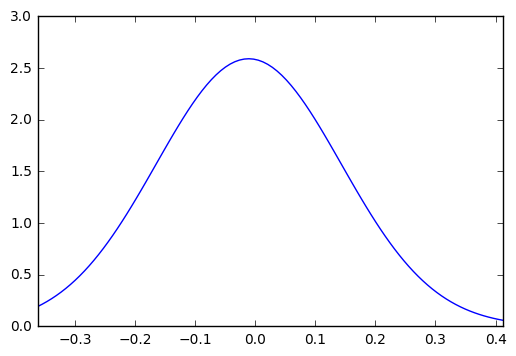

In [13]:
import matplotlib.mlab as mlab

mean = np.mean(W_flat)

variance = np.var(W_flat)
print(mean, variance)
sigma = np.sqrt(variance)
x = np.linspace(min(W_flat), max(W_flat), 100)
plt.plot(x, mlab.normpdf(x, mean, sigma))
plt.xlim((min(W_flat), max(W_flat)))

plt.show()

(array([ 0.71825447,  1.43650895,  1.70585438,  1.885418  ,  2.06498162,
         1.16716352,  1.70585438,  1.34672714,  0.53869086,  0.35912724]),
 array([-0.36193627, -0.28458826, -0.20724025, -0.12989224, -0.05254422,
         0.02480379,  0.1021518 ,  0.17949981,  0.25684782,  0.33419583,
         0.41154385]),
 <a list of 10 Patch objects>)

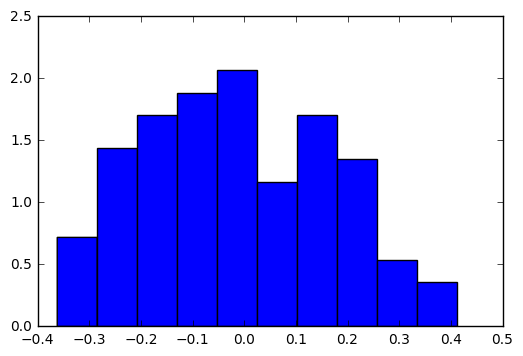

In [14]:
W_flat2 = W1[1].flatten()
plt.hist(W_flat2, normed= True)

# Fit a gaussian to histogram

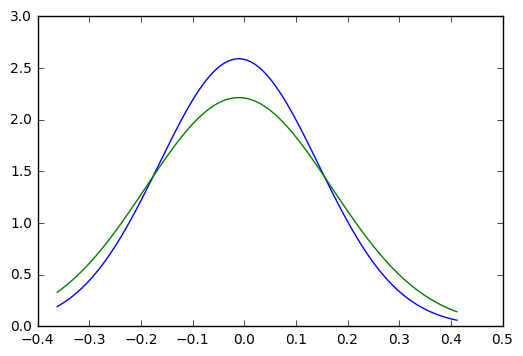

In [15]:
mean = np.mean(W_flat)
variance = np.var(W_flat)
sigma = np.sqrt(variance)
x = np.linspace(min(W_flat), max(W_flat), 100)
plt.plot(x, mlab.normpdf(x, mean, sigma))
mean = np.mean(W_flat)
variance = np.var(W_flat2)
sigma = np.sqrt(variance)
x = np.linspace(min(W_flat2), max(W_flat), 100)
plt.plot(x, mlab.normpdf(x, mean, sigma))
plt.show()

# Zero activation weights
or how many weights within a certain value range


In [16]:
margin = 0.
W_zero = W[0].flatten()
W_zero = np.multiply(W_zero>-margin,W_zero<margin)
print(len(W_zero))
W_margin = np.count_nonzero(W_zero)
W_margin_percent = W_margin/len(W_zero) *100
W_margin_percent

288


0.0

# Weights dense layers

In [65]:
layer_name = 'dense_5'
layer_idx = [idx for idx, layer in enumerate(model.layers) if layer.name == layer_name]
W = model.layers[layer_idx[0]].get_weights()

In [66]:
W_dense = np.squeeze(W)
# print(W[0].shape)
# W1 =np.transpose(W[0], (2,3,0,1))
print(W_dense[0].shape)

(128, 361)


In [67]:
margin = 0.1
W_zero = W[0].flatten()
W_zero = np.multiply(W_zero>-margin,W_zero<margin)
print(len(W_zero))
W_margin = np.count_nonzero(W_zero)
W_margin_percent = W_margin/len(W_zero) *100
W_margin_percent

46208


46.208448753462605

(46208,)
-0.194982 0.0466236


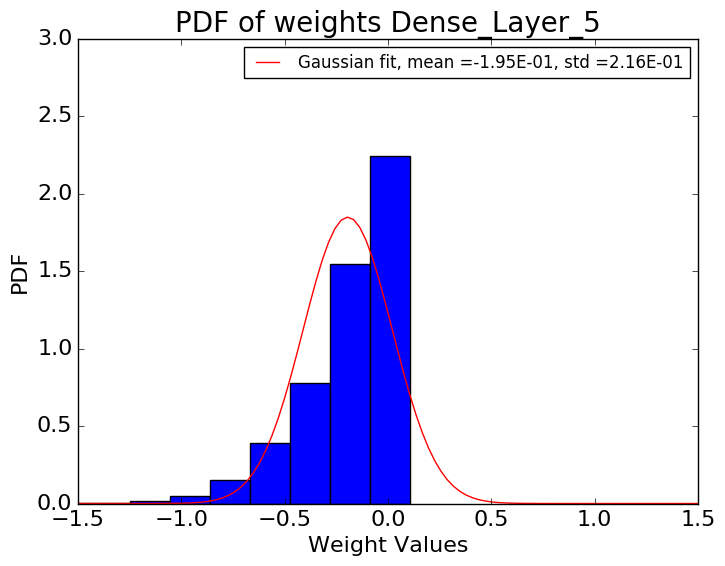

In [69]:
import matplotlib.pyplot as plt
W_flat = W[0].flatten()
print(W_flat.shape)

plt.figure(figsize = (8,6))
plt.hist(W_flat, normed = True)
plt.xlim((min(W_flat), max(W_flat)))

mean = np.mean(W_flat)

variance = np.var(W_flat)
print(mean, variance)
sigma = np.sqrt(variance)
x = np.linspace(-1.5, 1.5, 100)
plt.plot(x, mlab.normpdf(x, mean, sigma), color = 'r', 
         label = 'Gaussian fit, mean ='+ '%.2E' % Decimal(str(mean)) +
         ', std ='+ '%.2E' % Decimal(str(sigma)))
#plt.xlim((min(W_flat), max(W_flat)))
plt.ylim([0,3])
plt.xlim ([-1.5,1.5])
plt.title('PDF of weights Dense_Layer_5', fontsize = 20)
plt.xlabel('Weight Values', fontsize = 16)
plt.ylabel('PDF', fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend()
plt.show()